In [1]:
using LinearAlgebra
using Plots
using CSV, DataFrames
using Random
using Distributions
Random.seed!(1234);  # determinism

In [2]:
df = CSV.File("wdbc.data", header=0) |> DataFrame

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859


In [3]:
labels = df[:,2]
A = Matrix(df[:,3:end])
m, n = size(A)
# Pre-process data a bit
A = (I - ones(m, m) / m) * A  # subtract mean
for j = 1:n; A[:, j] = normalize(A[:, j]); end  # unit variance

In [4]:
V2 = svd(A).V[:, 1:2]
pcs = A * V2

569×2 Array{Float64,2}:
 -0.385384    -0.0816889 
 -0.100102     0.15797   
 -0.240377     0.0450736 
 -0.29861     -0.430775  
 -0.164976     0.0816674 
 -0.0997852   -0.16559   
 -0.0938589    0.112772  
 -0.0898517   -0.0981081 
 -0.1331      -0.142192  
 -0.266279    -0.32394   
  0.0339743    0.111483  
 -0.11114     -0.00279067
 -0.343134    -0.113231  
  ⋮                      
  0.170366    -0.00512157
  0.00413635   0.00895289
  0.045669    -0.054199  
  0.0201969    0.00746297
  0.204174     0.0893406 
 -0.248079    -0.146     
 -0.366456     0.0240572 
 -0.26995      0.149948  
 -0.159027     0.150251  
 -0.0526618    0.0797484 
 -0.434934    -0.0700943 
  0.229534     0.0281146 

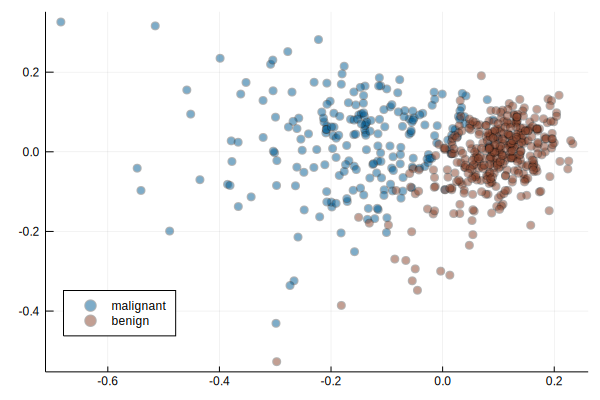

In [5]:
inds_M = findall(labels .== "M")
inds_B = findall(labels .== "B")
scatter(pcs[inds_M,1], pcs[inds_M,2], alpha=0.3, label="malignant", 
        legend=:bottomleft, title="")
scatter!(pcs[inds_B,1], pcs[inds_B,2], alpha=0.3, label="benign")

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/arb/.julia/packages/Plots/Ih71u/src/args.jl:751


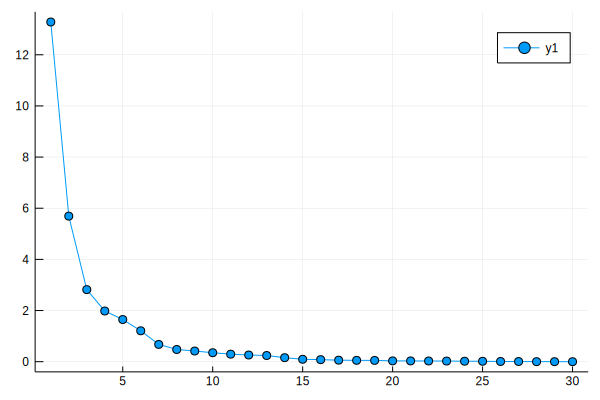

In [6]:
vals = vec(svd(A).S)
plot(sort(vals .^ 2, rev=true), marker="o")

In [7]:
sum(vals[1:2].^2) / sum(vals .^ 2)

0.6324320765155942